# Домашнее задание
___
Сравнить по времени разные реализации градиентного спуска и нормального уравнения в линейной регрессии:

1. Сгенерируйте облако рассеяния. Возьмите любое уравнение прямой и добавьте гаусовского шума.


2. Попробуйте найти решение через нормальное уравнение. Замерьте время исполнения кода при помощи %%time или %%timeit.


3. Реализуйте метод для вычисления градиента.


4. Реализуйте на основе этого метода пакетный, мини-пакетный и стохастический градиентный спуск. 


5. Запишите результаты времени выполнения кода в одну таблицу и укажите количество эпох обучения. 


Ноутбук с кодом и таблицу необходимо сдать до 01.11.2020!


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from simple_linear_regression import SimpleLinearRegression

### 1. Сгенерируйте облако рассеяния. Возьмите любое уравнение прямой и добавьте гаусовского шума.

Общий случай:
$$\large y = shift + tan * x $$
или если переписать в матричном виде
$$\large X \cdot w = y$$
где $w$ - матрица весов


В нашем случае $\theta = w$

In [18]:
lr = SimpleLinearRegression()
lr.__dict__.keys()

dict_keys(['_y_true', 'y', '_SimpleLinearRegression__shift', '_SimpleLinearRegression__tan', 'decimal_places'])

In [19]:
# смотрим на идеальные значения смещения и наклона
X, y = lr.X, lr.y
y_true = lr._y_true
true_shift  = lr._SimpleLinearRegression__shift
true_tan = lr._SimpleLinearRegression__tan

true_shift, true_tan

(0.409, 0.958)

In [20]:
def show_params(calc_shit, calc_tan, true_shift=true_shift, true_tan=true_tan):
    # bad test functuion
    print(f"Ideal shift - {true_shift} | calculate shift - {calc_shit}"
          f"| difference - {round(abs(calc_shit - true_shift), 3)}")
    print(f"Ideal tan - {true_tan} | calculate tan - {calc_tan}"
          f"| difference - {round(abs(calc_tan - true_tan), 3)}")

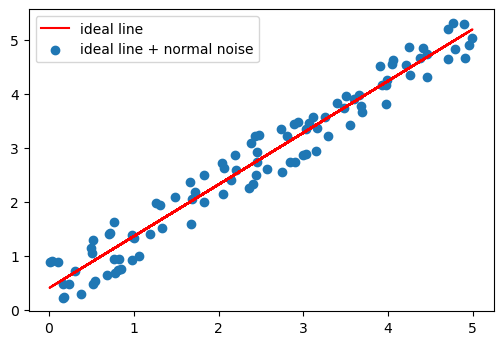

In [21]:
lr.plot_lines(y, plt_func=plt.scatter, label="ideal line + normal noise")

### 2. Попробуйте найти решение через нормальное уравнение. 
- Замерьте время исполнения кода при помощи %%time или %%timeit.

$$ \hat\theta = [X^T \cdot X]^{-1}\cdot X^T \cdot y $$

In [22]:
%%time
shift, tan = lr.theoretical_solution()
show_params(shift, tan)

Ideal shift - 0.409 | calculate shift - 0.389| difference - 0.02
Ideal tan - 0.958 | calculate tan - 0.96| difference - 0.002
Wall time: 2.99 ms


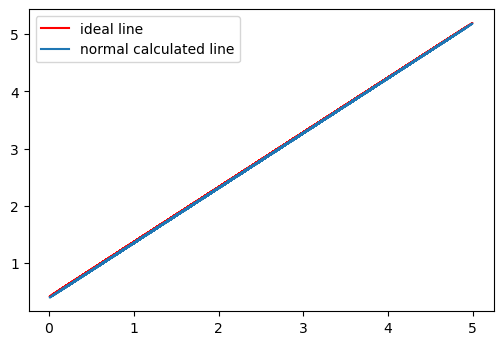

In [23]:
calc_y = shift + tan * X
lr.plot_lines(calc_y, label="normal calculated line")

### 3. Реализуйте метод для вычисления градиента.


In [24]:
SimpleLinearRegression.calc_gradient

<function simple_linear_regression.SimpleLinearRegression.calc_gradient(x_extend: numpy.ndarray, x_transpose: numpy.ndarray, y: numpy.ndarray, theta, batch_size)>

### 4. Реализуйте на основе этого метода  пакетный, мини-пакетный, стохастический градиентный спуск. 


### 4.1. Пакетный градиентный спуск

За одну по всем объектам считаем градиент, повторяем n_iter раз. 

In [25]:
%%time
shift, tan = lr.batch_gd()
show_params(shift, tan)

Ideal shift - 0.409 | calculate shift - 0.39| difference - 0.019
Ideal tan - 0.958 | calculate tan - 0.959| difference - 0.001
Wall time: 4 ms


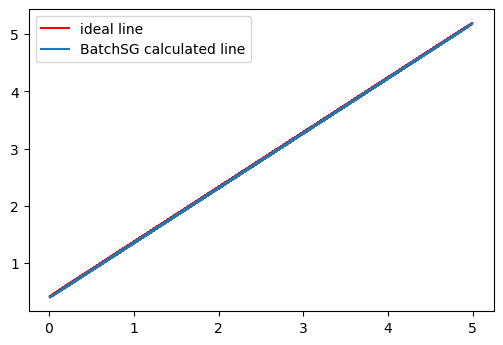

In [26]:
calc_y = shift + tan * lr.X
lr.plot_lines(calc_y, label="BatchSG calculated line")

### 4.2. Мини-пакетный градиентный спуск
За одну итерацию выбераем несколько объектов, по ним считаем градиент, повторить n_iter раз

In [51]:
%%time
shift, tan = lr.mini_batch_gd()
show_params(shift, tan)

Ideal shift - 0.409 | calculate shift - 0.325| difference - 0.084
Ideal tan - 0.958 | calculate tan - 1.011| difference - 0.053
Wall time: 7.99 ms


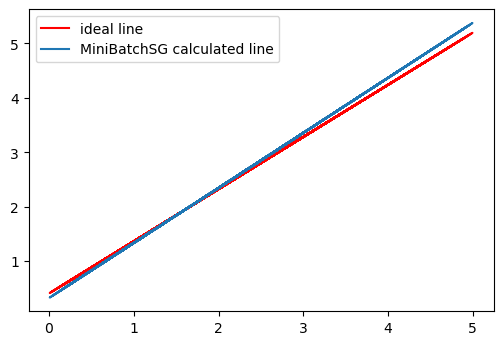

In [52]:
calc_y = shift + tan * lr.X
lr.plot_lines(calc_y, label="MiniBatchSG calculated line")

### 4.3. Cтохастический градиентный спуск
Выбираем один объект из выборки, по нему считаем градиент, повторяем n_iter раз

In [29]:
%%time
shift, tan = lr.stochastic_gd()
show_params(shift, tan)

Ideal shift - 0.409 | calculate shift - 0.214| difference - 0.195
Ideal tan - 0.958 | calculate tan - 0.899| difference - 0.059
Wall time: 7 ms


**В моём случае SGD часто расходится**

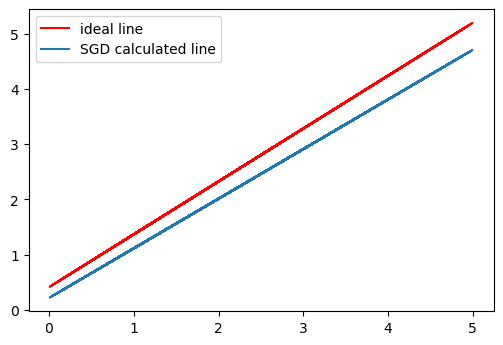

In [30]:
calc_y = shift + tan * lr.X
lr.plot_lines(calc_y, label="SGD calculated line")

### 5. Запишите результаты времени выполнения кода в одну таблицу и укажите количество эпох обучения.

In [31]:
%%timeit -n 1000
lr.theoretical_solution()
# Транспонированная и расширенная матрицы считаются единожды, при создании объекта класса

61.7 µs ± 6.06 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [34]:
%%timeit -n 1000
lr.batch_gd()

1.3 ms ± 75 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [33]:
%%timeit -n 1000
lr.mini_batch_gd()

3.14 ms ± 146 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [32]:
%%timeit -n 1000
lr.stochastic_gd()

2.85 ms ± 120 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [55]:
result = pd.DataFrame(
    {
        "Normal_equation": [0.0617 - 0.00606, 0.0617 + 0.00606, 0.0617],
        "BatchGD": [1.3 - 0.075, 1.3 + 0.075, 1.3 ],
        "MiniBatchGD": [3.14 - 0.146, 3.14 + 0.146, 3.14],
        "SGD": [2.85 - 0.120, 2.85 + 0.120, 2.85],
        "n_iter": [100]
    },
    index=["min", "max", "mean"]
)
result

Normal_equation  BatchGD  MiniBatchGD   SGD  n_iter
min           0.05564    1.225        2.994  2.73     100
max           0.06776    1.375        3.286  2.97     100
mean          0.06170    1.300        3.140  2.85     100

In [56]:
result.to_csv("Yakimchuk_gradient_descent_table.csv")

### Итого
- Количество итераций/эпох - 100
- Количество объектов - 100
- Время измерено в милисекундах


Решение нормального уравнения оказалось самым быстрым, т.к. расширенная и траспонированная матрицы создаются при создании объекта класса, такой подход не работает для больших матриц, т.к. в таком случае мы вынуждены держать в памяти 3 матрицы.
